# Maschinelles Lernen
# Aufgabenblatt 04 - Aufgabe 04
# Prof. Dr. David Spieler

In [19]:
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

matplotlib.rcParams['figure.figsize'] = (14, 12)

In [20]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(-1.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

# Überblick

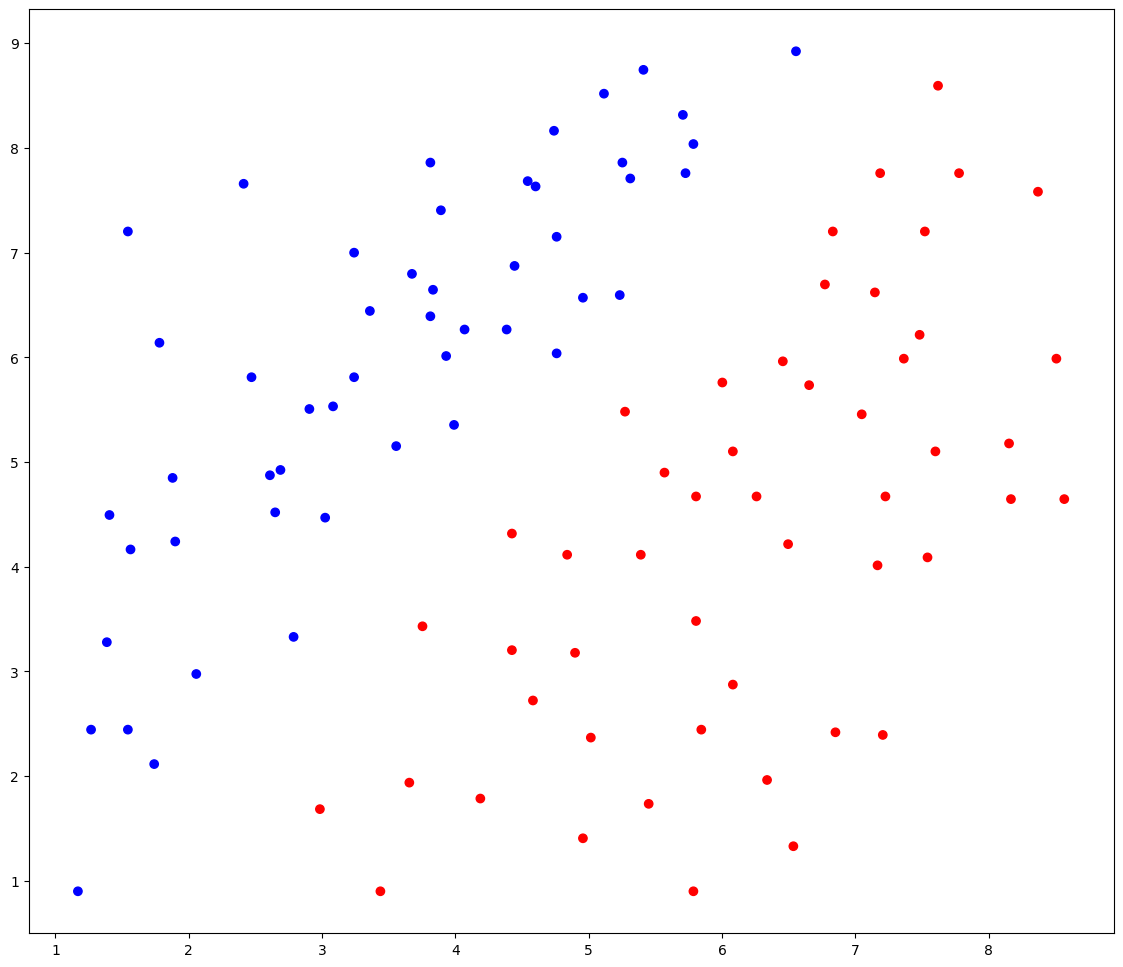

In [21]:
plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

# Implementierung

In [22]:
def adaline_sum(x1, x2, w):
    """
    compute the weighted sum w*x used for Adaline classification
    """
    w0, w1, w2 = w
    ada_sum = w0 + w1 * x1 + w2 * x2 
    return ada_sum

def adaline_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    ada_sum = adaline_sum(x1, x2, w)
    if ada_sum > 0:
        return 1
    elif ada_sum == 0:
        return 0
    else:
        return -1
    
    
def adaline_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plot.figure()
    plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])
    
def adaline_learn_step(x1, x2, y, w, eta):
    """
    perform a full Adaline learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly with learning rate eta
    and return the new weights
    """
    w0, w1, w2 = w
    for i in range(len(x1)):
        classificaton = adaline_classify(x1[i], x2[i], w)
        w0 = w0 + eta * (y[i] - classificaton) * 1
        w1 = w1 + eta * (y[i] - classificaton) * x1[i]
        w2 = w2 + eta * (y[i] - classificaton) * x2[i]
    w = [w0, w1, w2]
    return w

def adaline_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the Adaline with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    # todo
    classification_sum = 0
    w0, w1, w2 = w
    for i in range(len(x1)):
        classification_sum += abs(y[i] - adaline_classify(x1[i], x2[i], w))

    n = len(x1)
    accuracy = 1/n * classification_sum
    return accuracy

def adaline_learn(x1, x2, y, eta, gamma):
    """
    implementation of the Adaline learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i, accuracy threshold gamma, and learning rate
    eta; a visualization should be plotted every 20 iterations
    """
    w = [0,0,0]
    i = 0
    accuracy = adaline_accuracy(x1, x2, y, w)
    while accuracy > gamma:
        w = adaline_learn_step(x1, x2, y, w, eta)
        i += 1

        if i % 20 == 0:
            adaline_visualize(x1, x2, y, w)

        accuracy = adaline_accuracy(x1, x2, y, w)
    return w, i

# Training

182
[140.79999999999984, -333.79275999999743, 277.9869600000003]


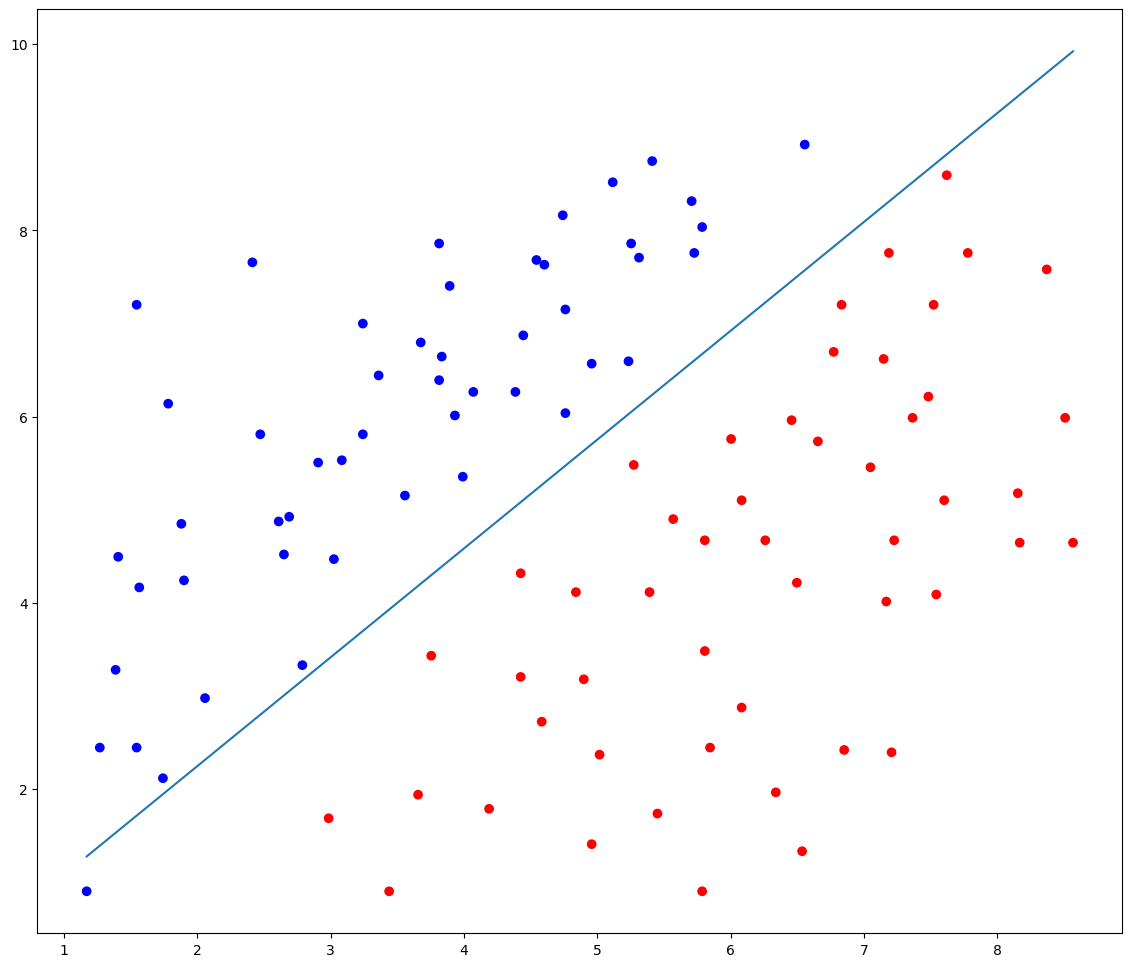

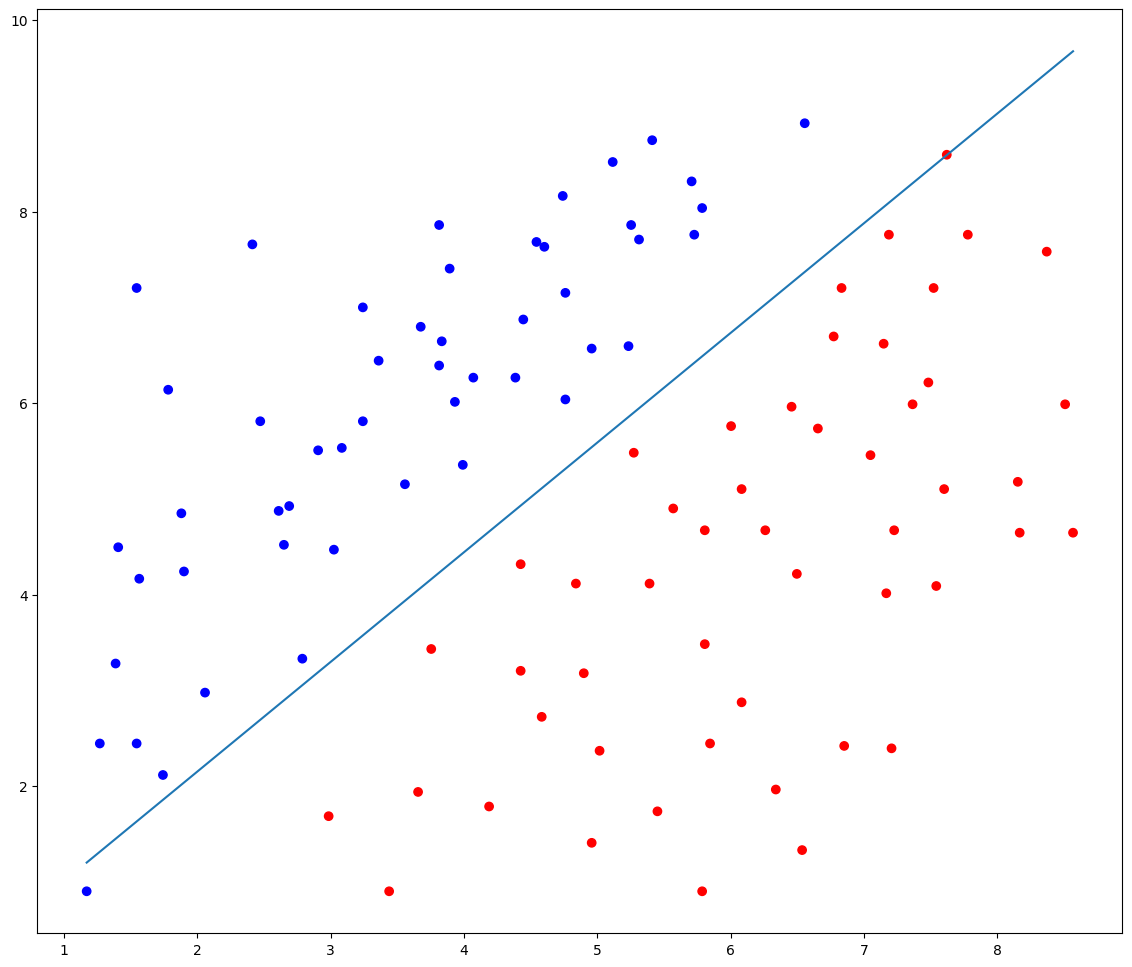

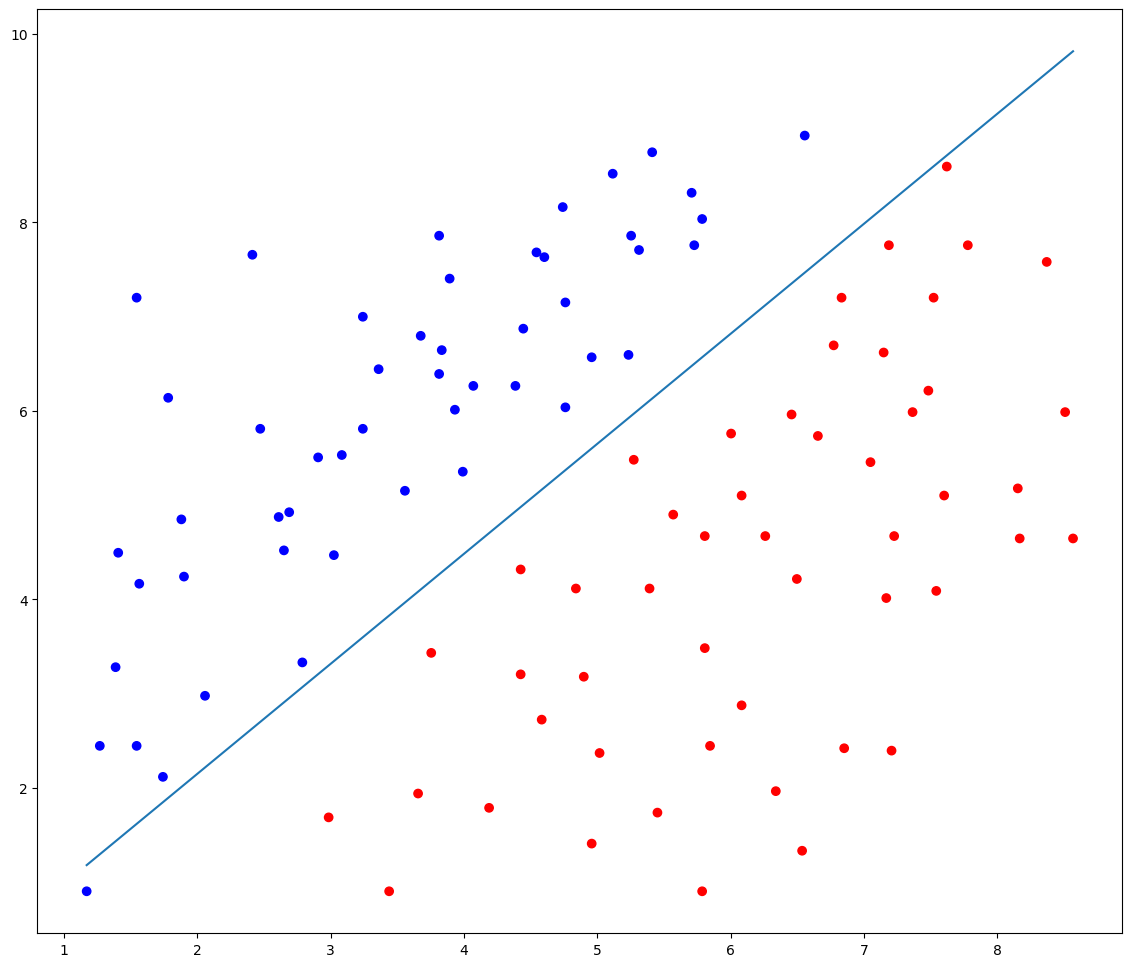

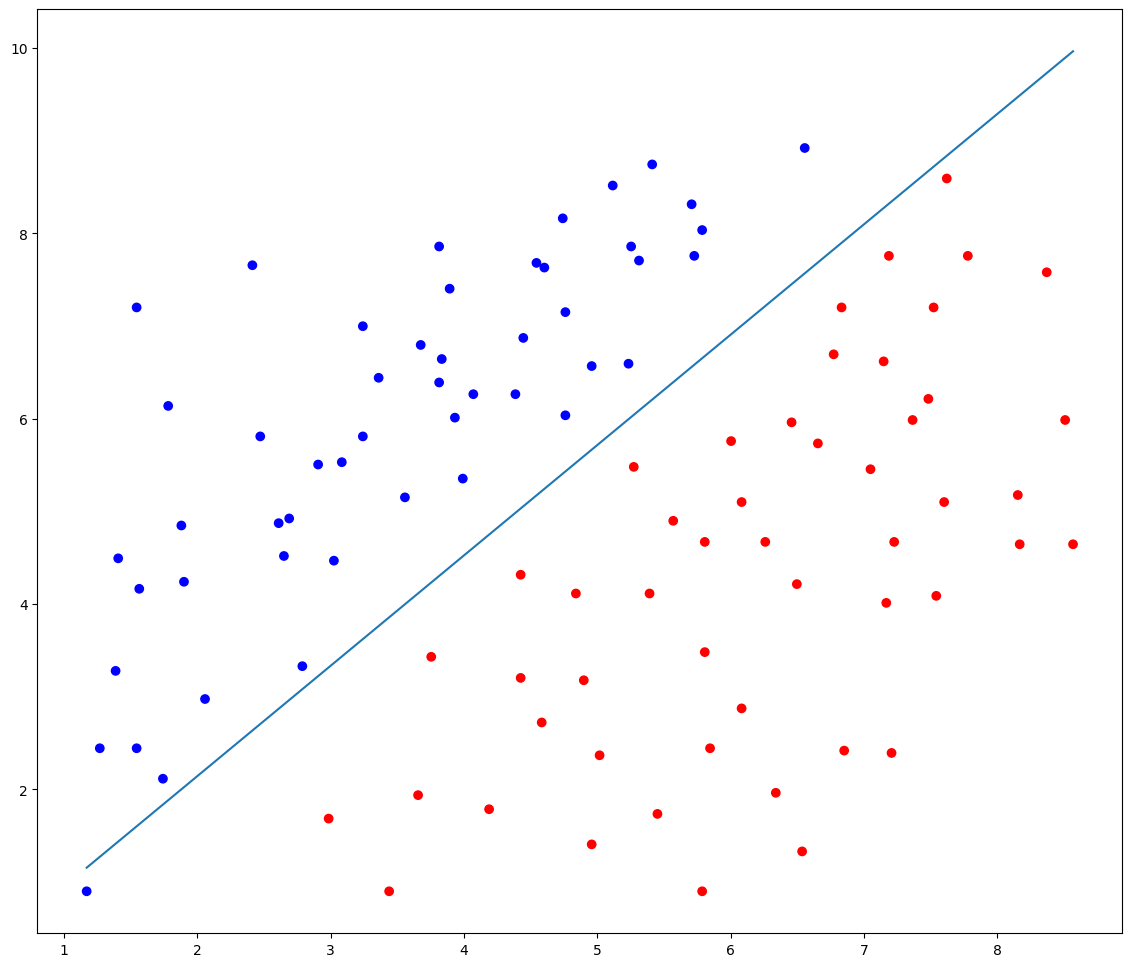

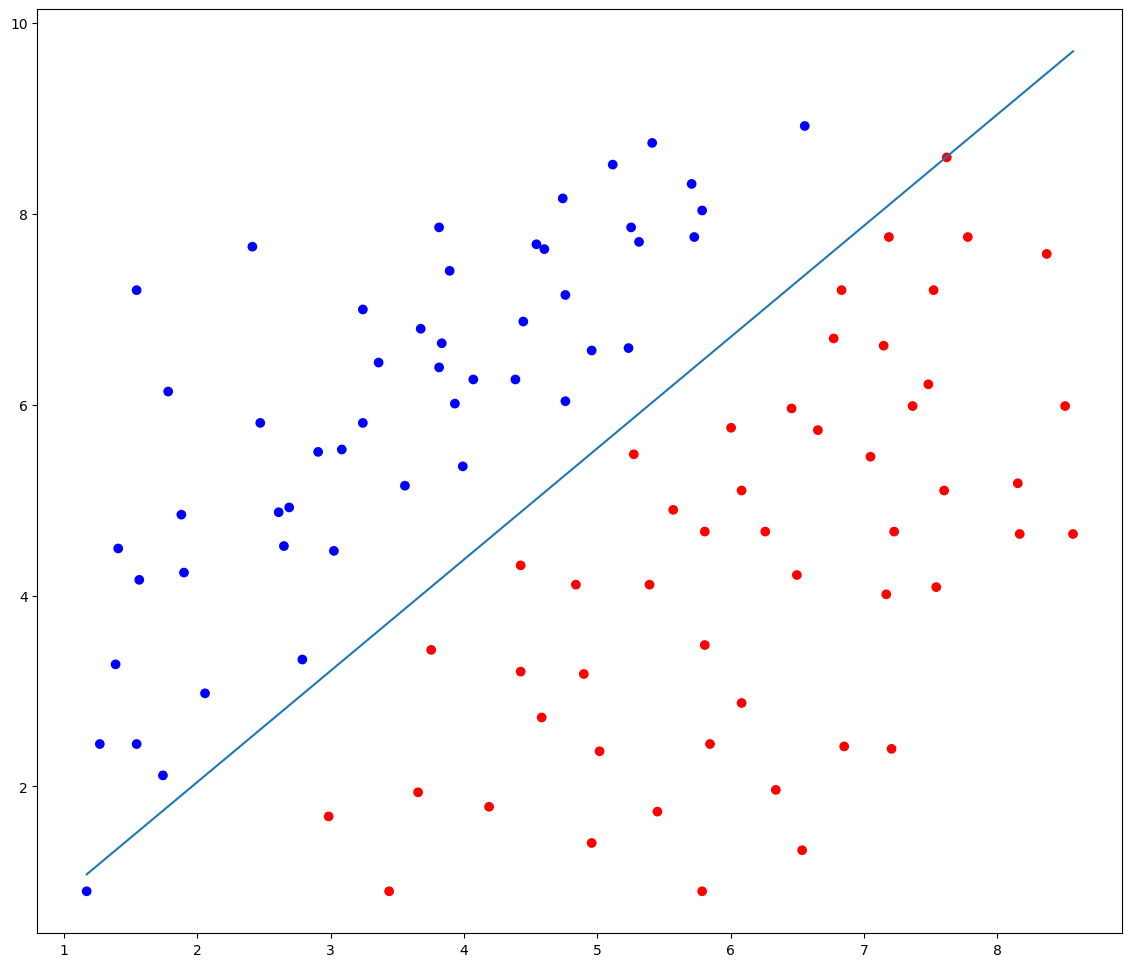

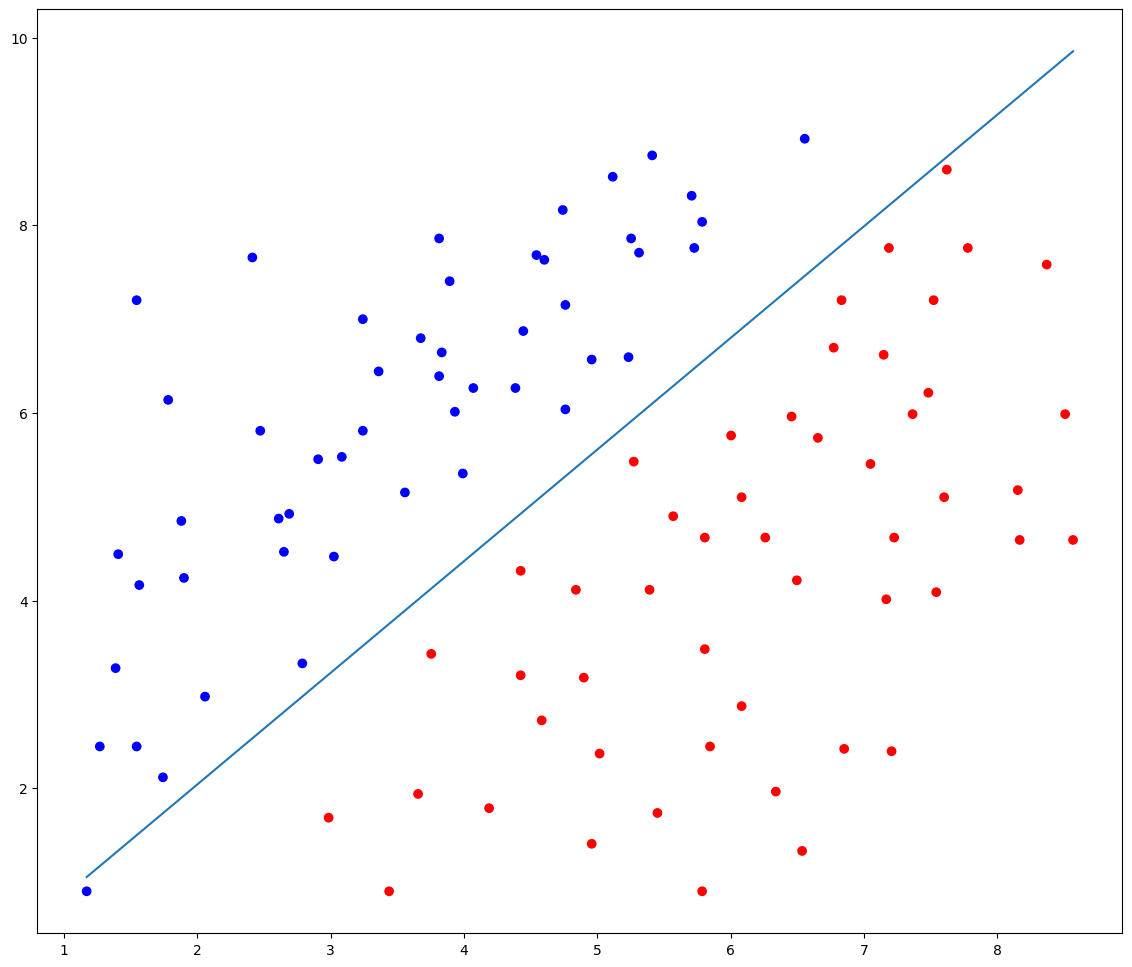

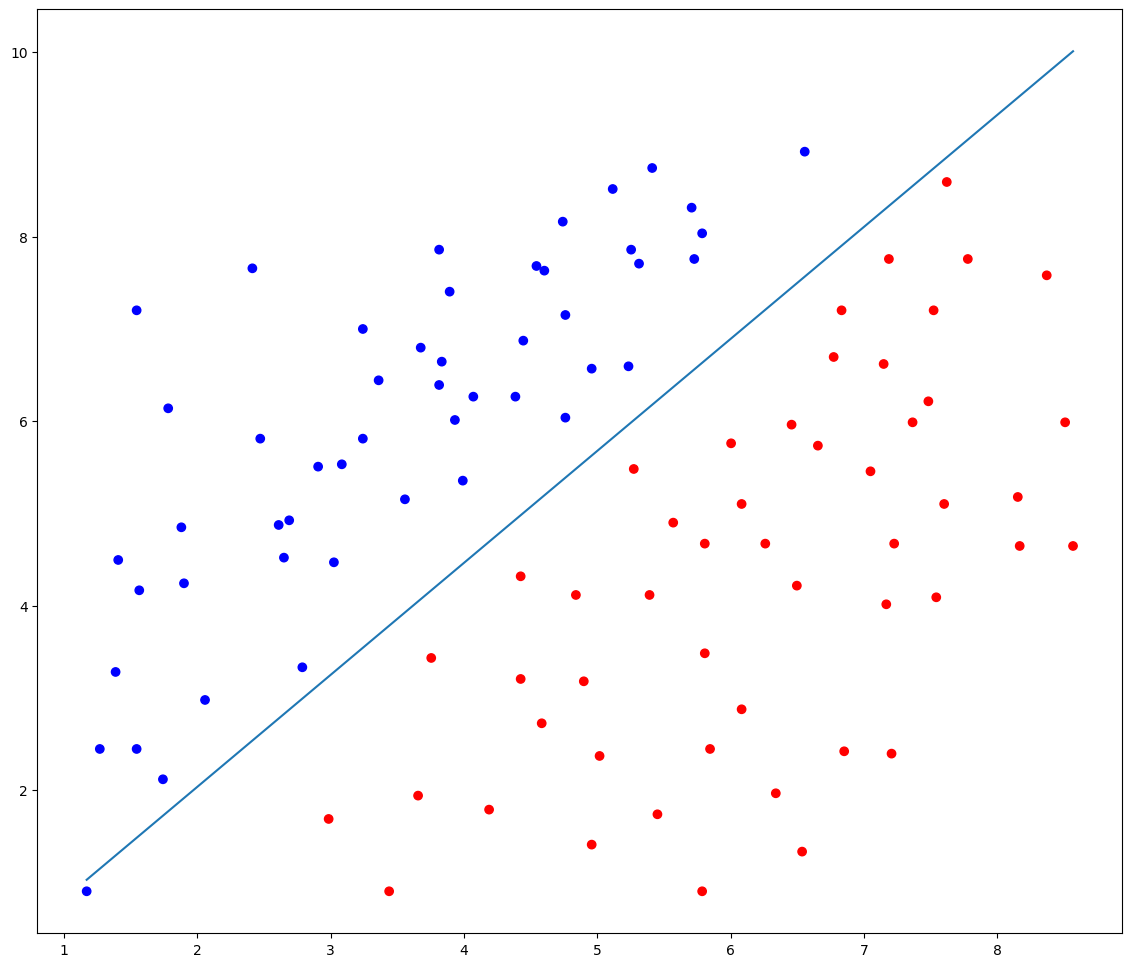

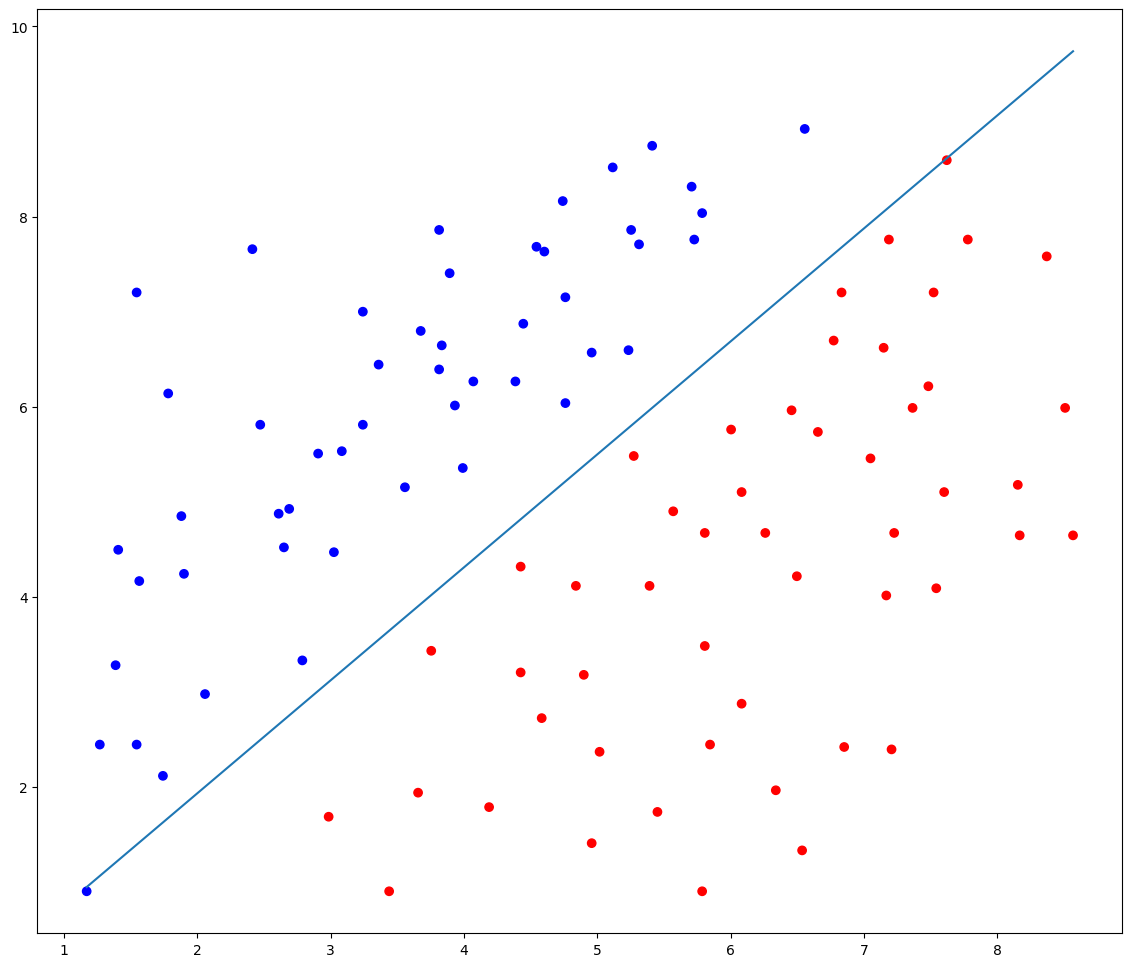

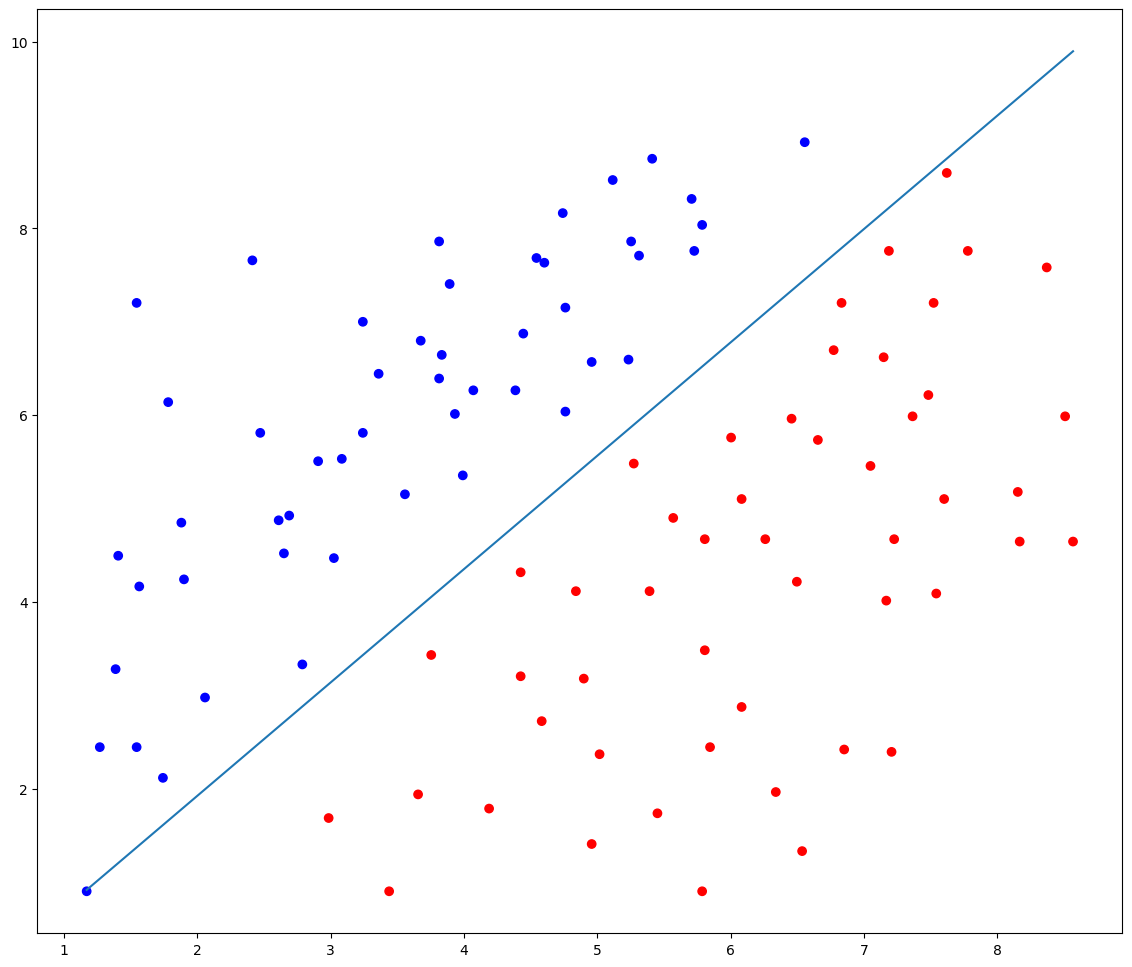

In [34]:
w, i = adaline_learn(x1, x2, y, 0.05, 0.0)

print(i)
print(w)